In [1]:
import tensorflow as tf
import os
import cv2
import imghdr


# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')


data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']








In [2]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        print(image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Cam_D_063093.JPG
Cam_D_063094.JPG
Cam_D_063095.JPG
Cam_D_063096.JPG
Cam_D_063097.JPG
Cam_D_063098.JPG
Cam_D_063099.JPG
Cam_D_063100.JPG
Cam_D_063101.JPG
Cam_D_063102.JPG
Cam_D_063103.JPG
Cam_D_063104.JPG
Cam_D_063105.JPG
Cam_D_063106.JPG


KeyboardInterrupt: 

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(256,256), batch_size=32) #defaulted 32 batch size
element_spec = data.element_spec

# Access the first batch from the dataset
first_batch = next(iter(data))

# Extract the first image from the batch
first_image = first_batch[0][0]
image_shape = first_image.shape
image_size = (first_image.shape[0], first_image.shape[1])


#Class 0 = dobre slike
# Class 1 = lose slike
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

print(image_size)

Found 8762 files belonging to 2 classes.
(256, 256)


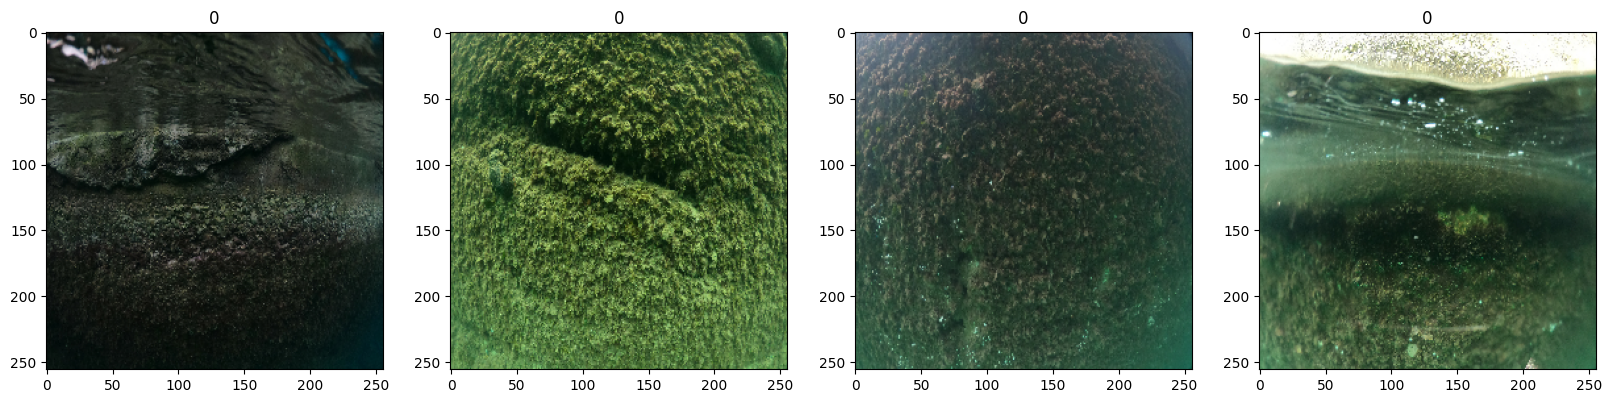

In [3]:
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:

data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()



(array([[[[0.33283165, 0.52498853, 0.34851792],
          [0.34034544, 0.52465916, 0.35995328],
          [0.2425245 , 0.45428923, 0.32536766],
          ...,
          [0.2403148 , 0.8055147 , 0.72205883],
          [0.1087546 , 0.66586244, 0.6815487 ],
          [0.        , 0.4971316 , 0.52179843]],
 
         [[0.3467448 , 0.5257008 , 0.3498085 ],
          [0.28562346, 0.48954505, 0.34836856],
          [0.2663718 , 0.45852864, 0.34480315],
          ...,
          [0.33112746, 0.8252451 , 0.73112744],
          [0.16370252, 0.7288986 , 0.693053  ],
          [0.1407935 , 0.60647976, 0.5785386 ]],
 
         [[0.22198223, 0.4203891 , 0.2942249 ],
          [0.2509804 , 0.4627451 , 0.3372549 ],
          [0.23921569, 0.4392157 , 0.31764707],
          ...,
          [0.33039215, 0.8480392 , 0.75392157],
          [0.22071078, 0.7914101 , 0.7033586 ],
          [0.14047182, 0.66228557, 0.63091683]],
 
         ...,
 
         [[0.56440717, 0.69014245, 0.34528953],
          [0.48726

In [5]:
len(data)


274

In [6]:


train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


# Build model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [14]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)       

# Train

In [16]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# Plot

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Eval 

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


print(pre.result(), re.result(), acc.result())

#  test

In [ ]:
import cv2

img = cv2.imread('Cam_R_030880.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Lose')
else:
    print(f'Predicted class is Dobra')

In [ ]:
# save model 
from tensorflow.keras.models import load_model
model.save(os.path.join('models','prvi_model_yT_guy.h5'))



In [ ]:
new_model = load_model('models/prvi_model_yT_guy.h5')

new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def AlexNet():
  inp = layers.Input((256, 256, 3))
  x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(256, 5, 1, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)
  x = layers.Conv2D(256, 3, 1, activation='relu')(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(1, activation='sigmoid')(x)

  model_ADAM_pametni = Model(inputs=inp, outputs=x)

  return   model_ADAM_pametni 


model_ADAM_pametni = AlexNet()
model_ADAM_pametni.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model_ADAM_pametni.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, 
                   monitor='loss')

In [ ]:
model_ADAM_pametni.fit(train, epochs=20, validation_data=test,
          callbacks=[es])

In [ ]:
# save model 
from tensorflow.keras.models import load_model
model_ADAM_pametni.save(os.path.join('models','AlexNetModel.h5'))

new_model = load_model('models/AlexNetModel.h5')


# VGG16 model  - treba jaci komp

In [7]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [8]:
model_vgg = Sequential()
model_vgg.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [11]:
model_vgg.add(Flatten())
model_vgg.add(Flatten())
model_vgg.add(Dense(512, activation='relu'))
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dense(1, activation='sigmoid'))

In [18]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model_vgg.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [19]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
model_vgg.summary()

model_vgg.fit(train,epochs=20, validation_data= val,callbacks=[tensorboard_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                   

KeyboardInterrupt: 